In [4]:
import numpy as np
from mcmcwrapper import MCMCWrapper

In [7]:
import matplotlib.pyplot as plt

def model(pars, x):
    a, b, c = pars
    return a * x**2 + b * x + c

true_params = [2.0, -1.0, 0.5]
x_data = np.linspace(-5, 5, 100)
y_true = model(true_params, x_data)
np.random.seed(42)
y_obs = y_true + np.random.normal(0, 1.0, size=len(x_data))

parnames = ["a", "b", "c"]
initial_guess = [1.0, 0.0, 0.0]
prior_bounds = [[-10, 10], [-10, 10], [-10, 10]]
noise_std = 1.0

wrapper = MCMCWrapper(
    model_function=model,
    data=y_obs,
    x=x_data,
    varnames=parnames,
    varvalues=initial_guess,
    priortypes = ['unif']*2,
    priorvars=prior_bounds[:-1],
    sampleparams = [True, False, True],
    noise=noise_std)

sampler = wrapper.run_mcmc(nwalkers=30, nsteps=1000)

You must install the tqdm library to use progress indicators with emcee


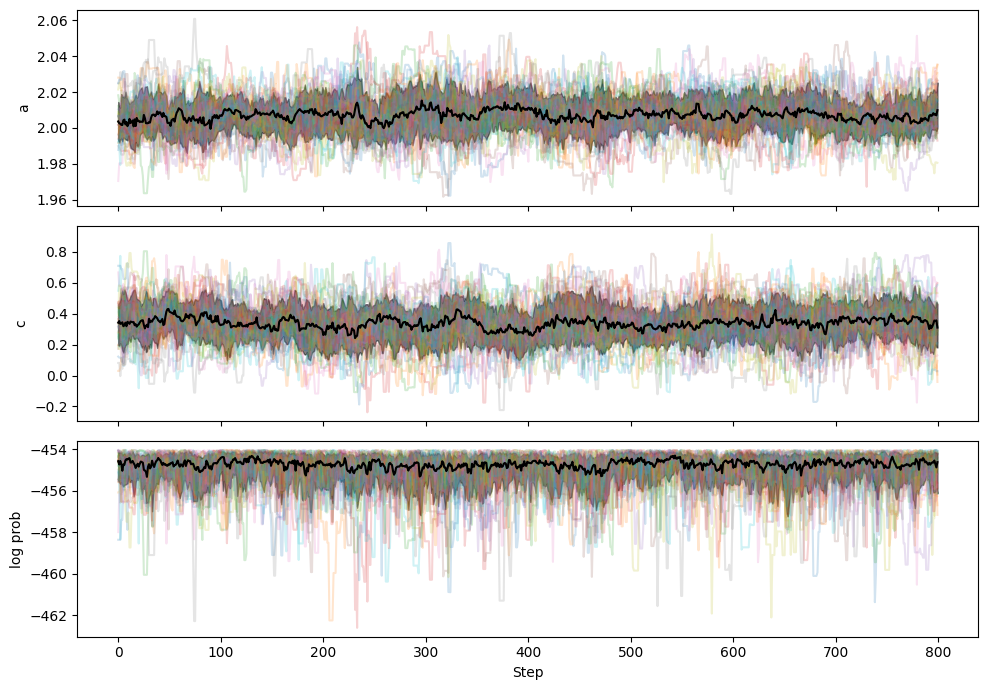

In [8]:
wrapper.walker_plot()

In [1]:
samples = sampler.get_chain(discard=200, thin=15, flat=True)

medians = np.median(samples, axis=0)
lower = np.percentile(samples, 16, axis=0)
upper = np.percentile(samples, 84, axis=0)

for i, name in enumerate(wrapper.parnames):
    med = medians[i]
    lo = med - lower[i]
    hi = upper[i] - med
    print(f"{name}: {med:.3f} (+{hi:.3f}/-{lo:.3f})")

    
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = list(parnames)
for i in range(3):
    ax = axes[i]
    ax.plot(sampler.get_chain()[:, :, i], alpha=0.5)
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("Step")
plt.tight_layout()
plt.show()

NameError: name 'sampler' is not defined

In [2]:
plt.plot(x_data,y_obs, 'o')
plt.plot(x_data, model([medians[0], medians[1], medians[2]], x_data))
plt.show()

NameError: name 'plt' is not defined

Text(0, 0.5, '$\\Delta~y$')

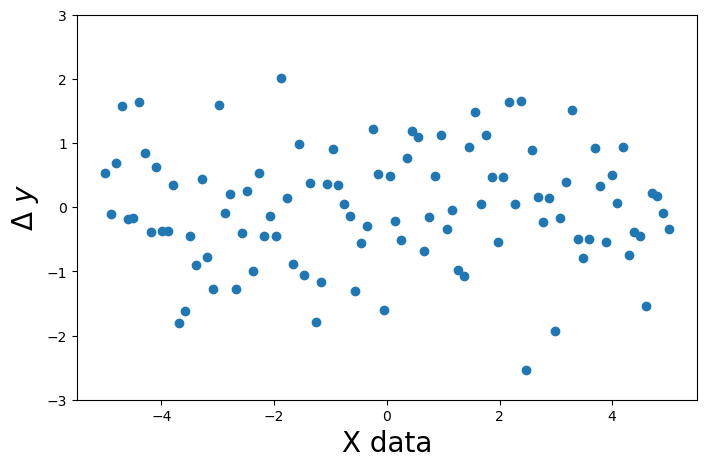

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x_data, y_obs- model([medians[0], medians[1], medians[2]], x_data), 'o')
plt.ylim(-3,3)
ax.set_xlabel('X data',size=20)
ax.set_ylabel(r'$\Delta~y$',size=20)